# Heart Attack

A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/may not getting chance of heart attack.

This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.

## Loading the heart dataset

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

In [3]:
# print metadata
section_title = "Metadata:"
print("*" * (len(section_title) + 4))
print((f"* {section_title} *"))
print("*" * (len(section_title) + 4))
print(heart_disease.metadata)

# variable information
section_title = "Variable information:"
print("\n")
print("*" * (len(section_title) + 4))
print((f"* {section_title} *"))
print("*" * (len(section_title) + 4))
heart_disease.variables

*************
* Metadata: *
*************
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


## Data Analysis

### Packages import

#### Loading dataset

In [4]:
import numpy as np
import pandas as pd

#### Visualisation

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

#### Data preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

#### Data splitting

In [7]:
from sklearn.model_selection import train_test_split

#### Data modeling

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### Building the dataframe

In [9]:
df_online = pd.concat([X, y], axis=1)
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [10]:
df_local = pd.read_csv('../assets/data/heart.csv')
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df = df_local
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### EDA

In [12]:
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_widgets()


#### 1. Basic Statistics:

In [13]:
# Display basic statistics of the dataset
df_local.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 2. Distribution of Target Variable:

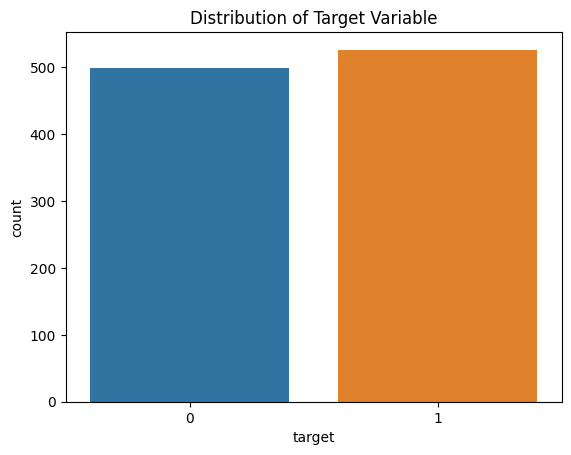

In [14]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df_local)
plt.title('Distribution of Target Variable')
plt.show()


#### 3. Distribution of Numerical Features:

In [53]:
# # Plot histograms for numerical features
# df_local.hist(bins=20, figsize=(15, 10))
# plt.suptitle('Histograms of Numerical Features', y=0.95)
# plt.show()


#### 4. Correlation Matrix:

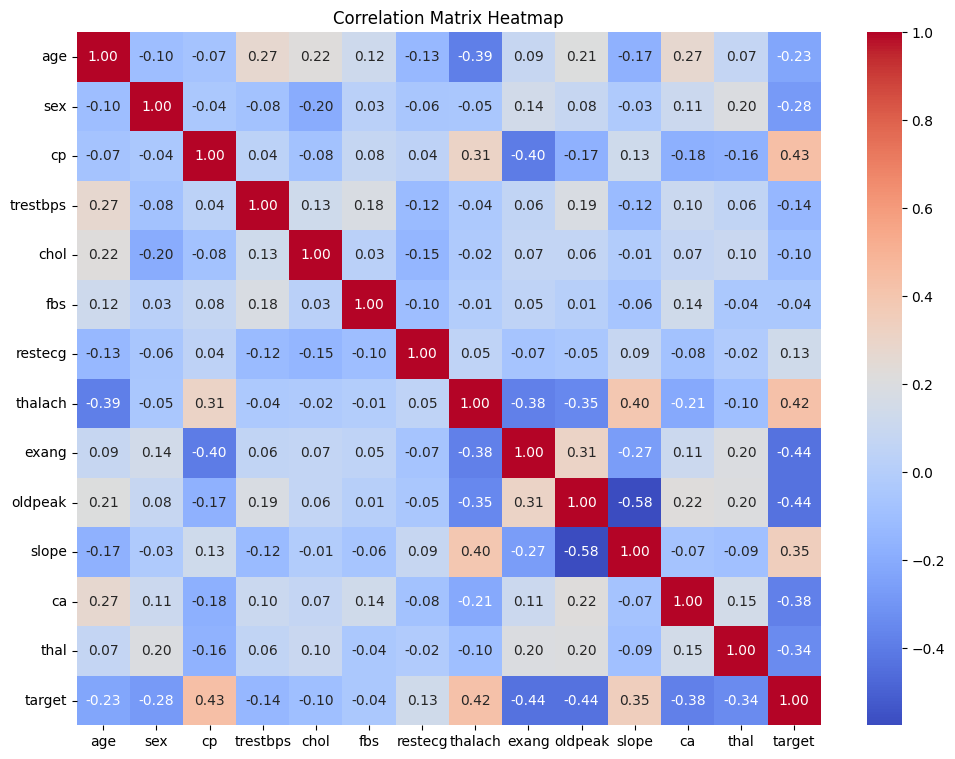

In [16]:
# Plot a correlation matrix heatmap
correlation_matrix = df_local.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


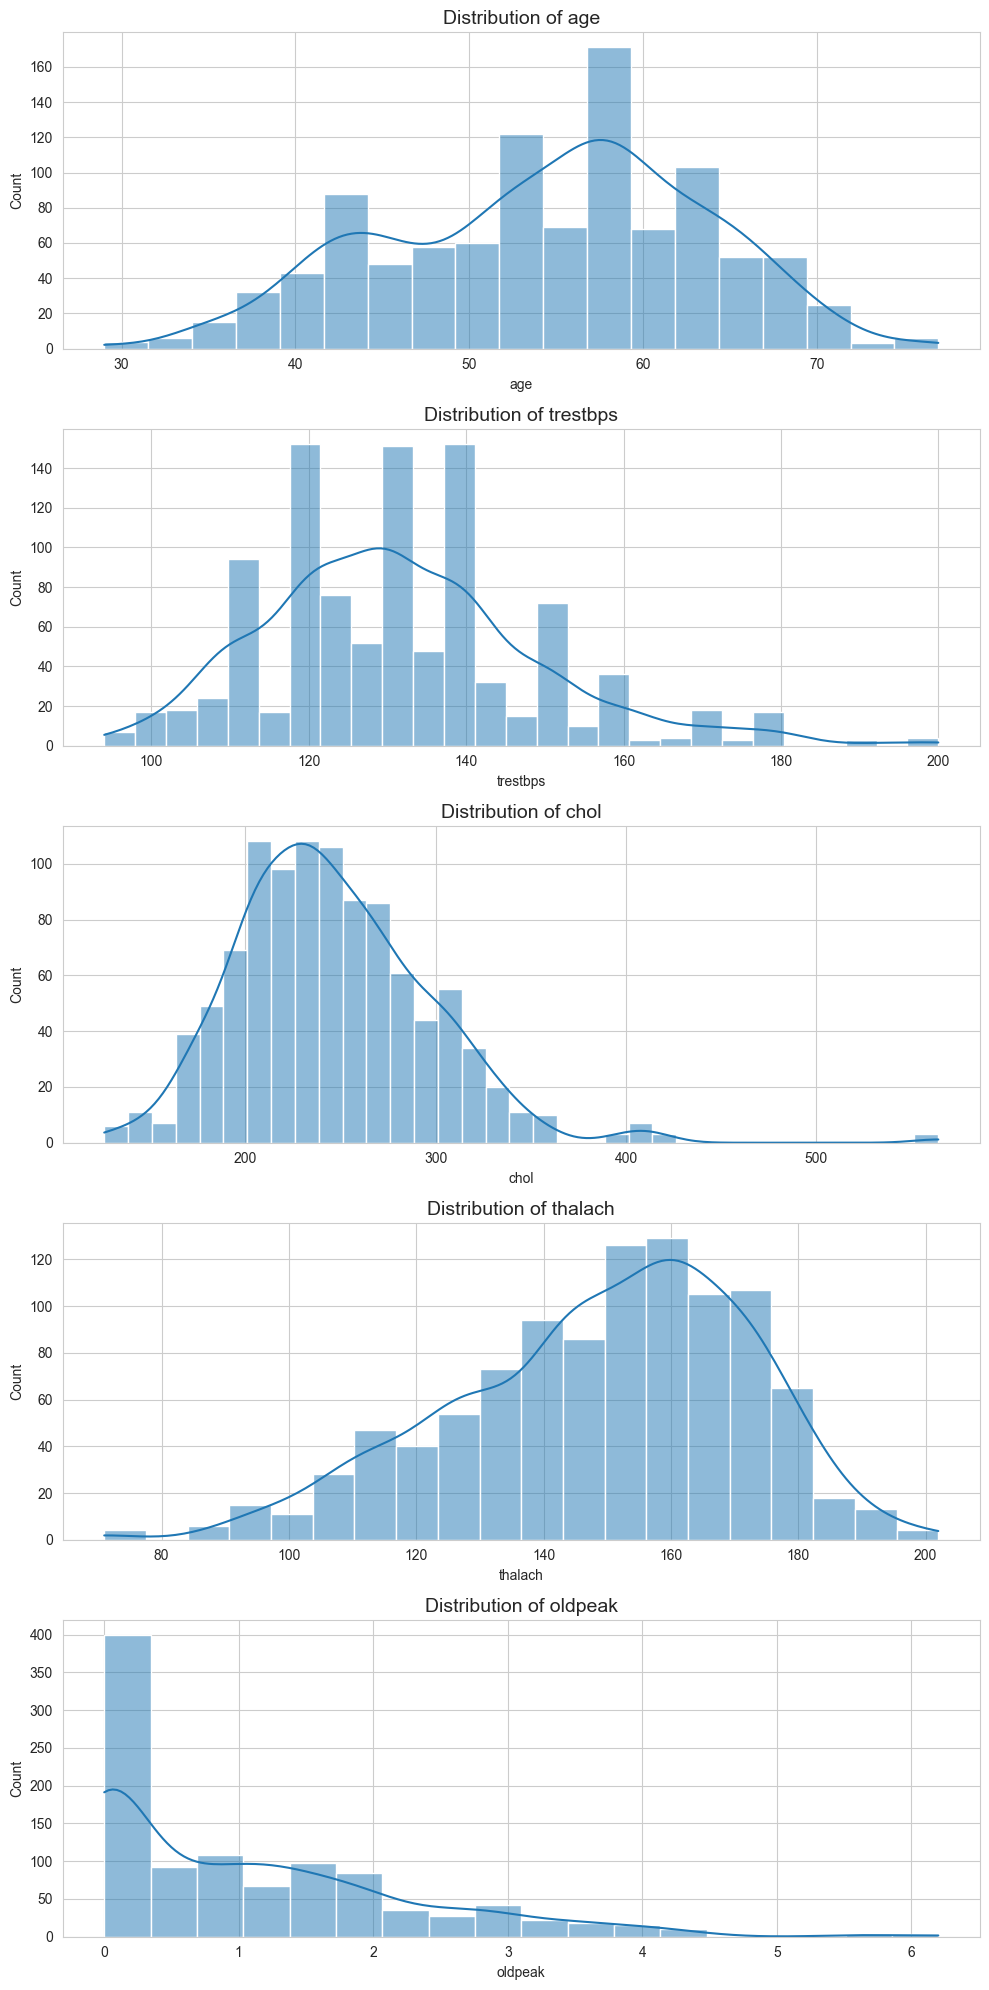

In [50]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Identifying categorical and continuous features for appropriate plotting
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous_features = [col for col in df.columns if col not in categorical_features]

# Plotting the distributions
fig, axes = plt.subplots(len(continuous_features), 1, figsize=(10, 20))

for i, col in enumerate(continuous_features):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

fig.tight_layout()
plt.show()


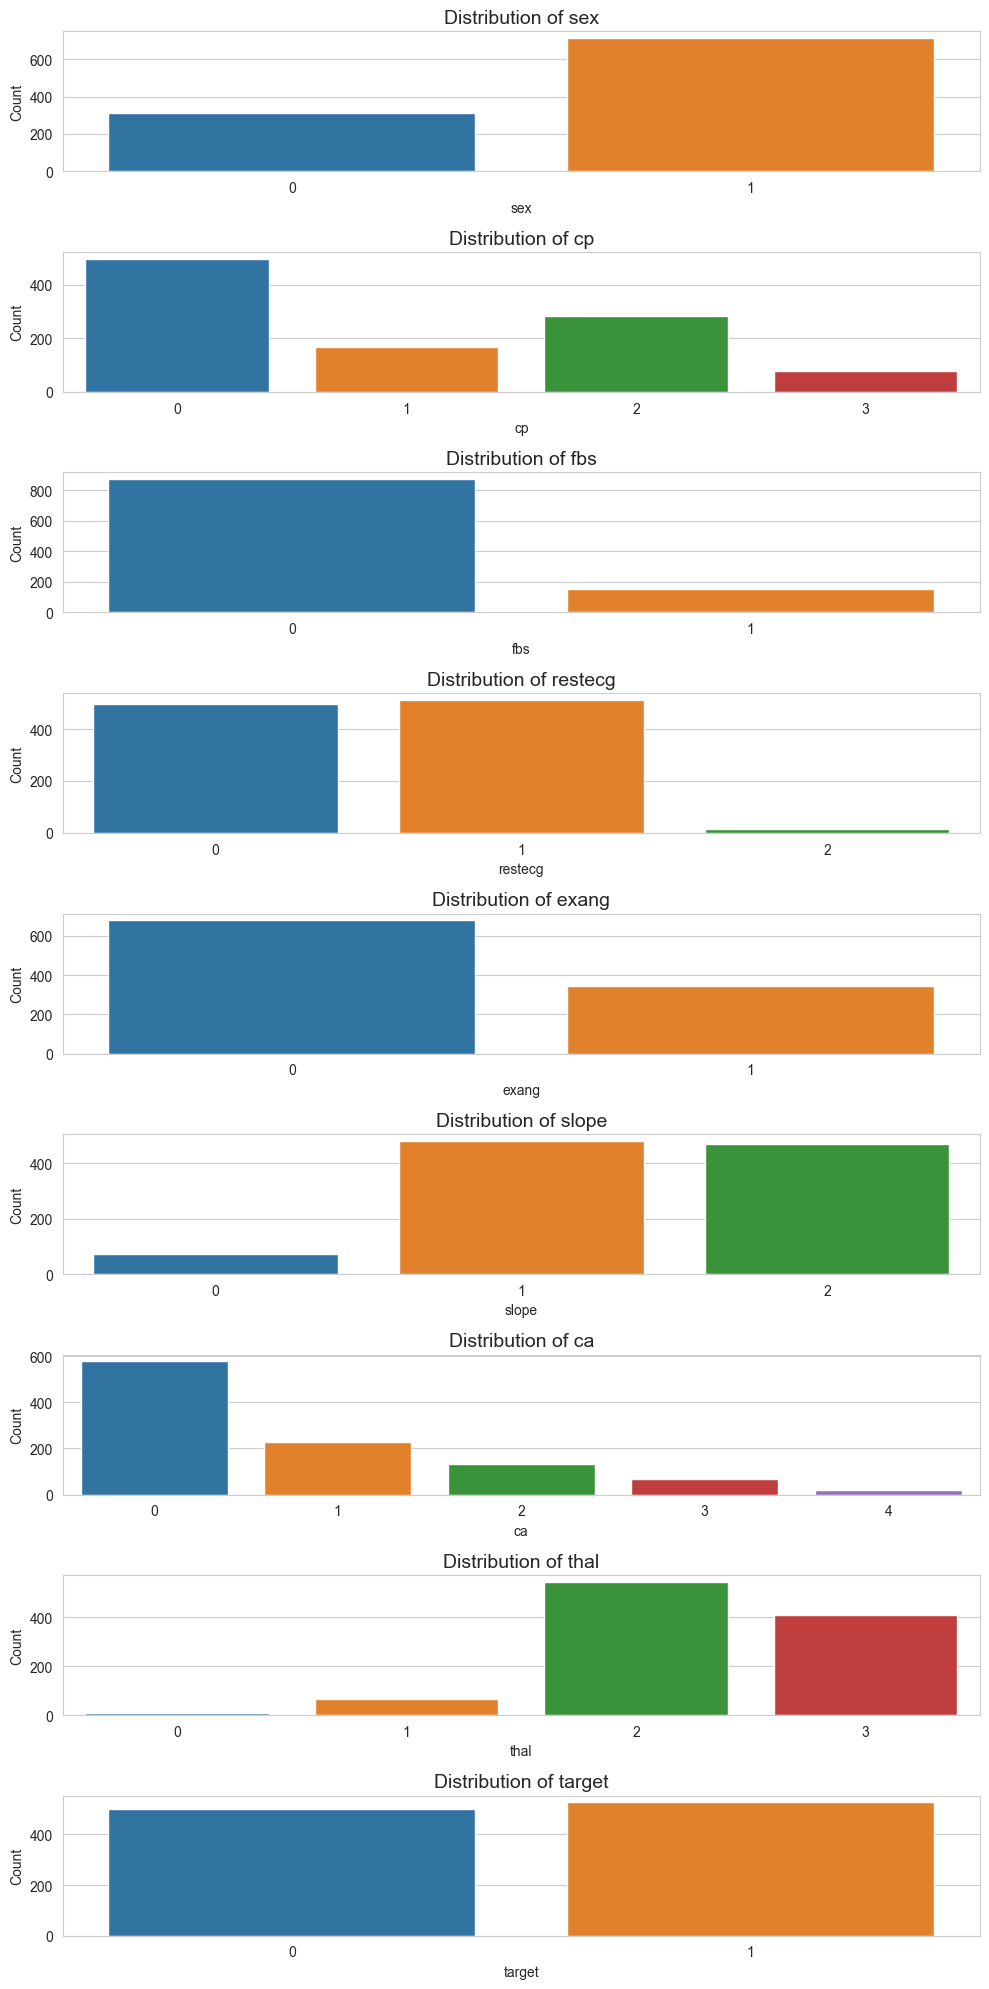

In [52]:
# Plotting the distributions for categorical features
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 20))

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

fig.tight_layout()
plt.show()


#### 5. Pair Plot:

In [54]:
# # Plot pairwise relationships in the dataset
# # sns.pairplot(df_local, hue='target', diag_kind='kde')
# # plt.suptitle('Pair Plot of Features', y=1.02)
# # plt.show()

# # Identify the most correlated features with the target variable
# target_correlation = correlation_matrix['target'].abs().sort_values(ascending=False)
# most_correlated_features = target_correlation[:6].index

# # Plot pair plots for the most correlated features
# sns.pairplot(df_local[most_correlated_features], hue='target', diag_kind='kde')
# plt.suptitle('Pair Plot of Most Correlated Features', y=1.02)
# plt.show()


#### 6. Box Plots for Categorical Features:

In [55]:
# # Plot box plots for categorical features
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# for feature in categorical_features:
#     sns.boxplot(x='target', y=feature, data=df_local)
#     plt.title(f'Box Plot of {feature} by Target Variable')
#     plt.show()


### Model trainings

#### Splitting data into 70% training and 30% test data:

In [19]:
y = df["target"]
X = df.drop("target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

We took advantage of the built-in support for stratification via stratify=y. In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset. We can use NumPy’s bincount function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:


In [20]:
print("Labels counts in y:", np.bincount(y))
print("Labels counts in y_train:", np.bincount(y_train))
print("Labels counts in y_test:", np.bincount(y_test))

Labels counts in y: [499 526]
Labels counts in y_train: [399 421]
Labels counts in y_test: [100 105]


#### Standardizing the features:

In [21]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the StandardScaler class from the preprocessing module and initialized a new StandardScaler object that we assigned to the sc variable. Using the fit method, StandardScaler estimated the parameters, 𝜇 (sample mean) and 𝜎 (standard deviation), for each feature dimension from the training data. By calling the transform method, we then standardized the training data using those estimated parameters, 𝜇 and 𝜎. Note that we used the same scaling parameters to standardize the test dataset so that both the values in the training and test dataset are comparable with one another.


#### Perceptron

Having standardized the training data, we can now train a perceptron model

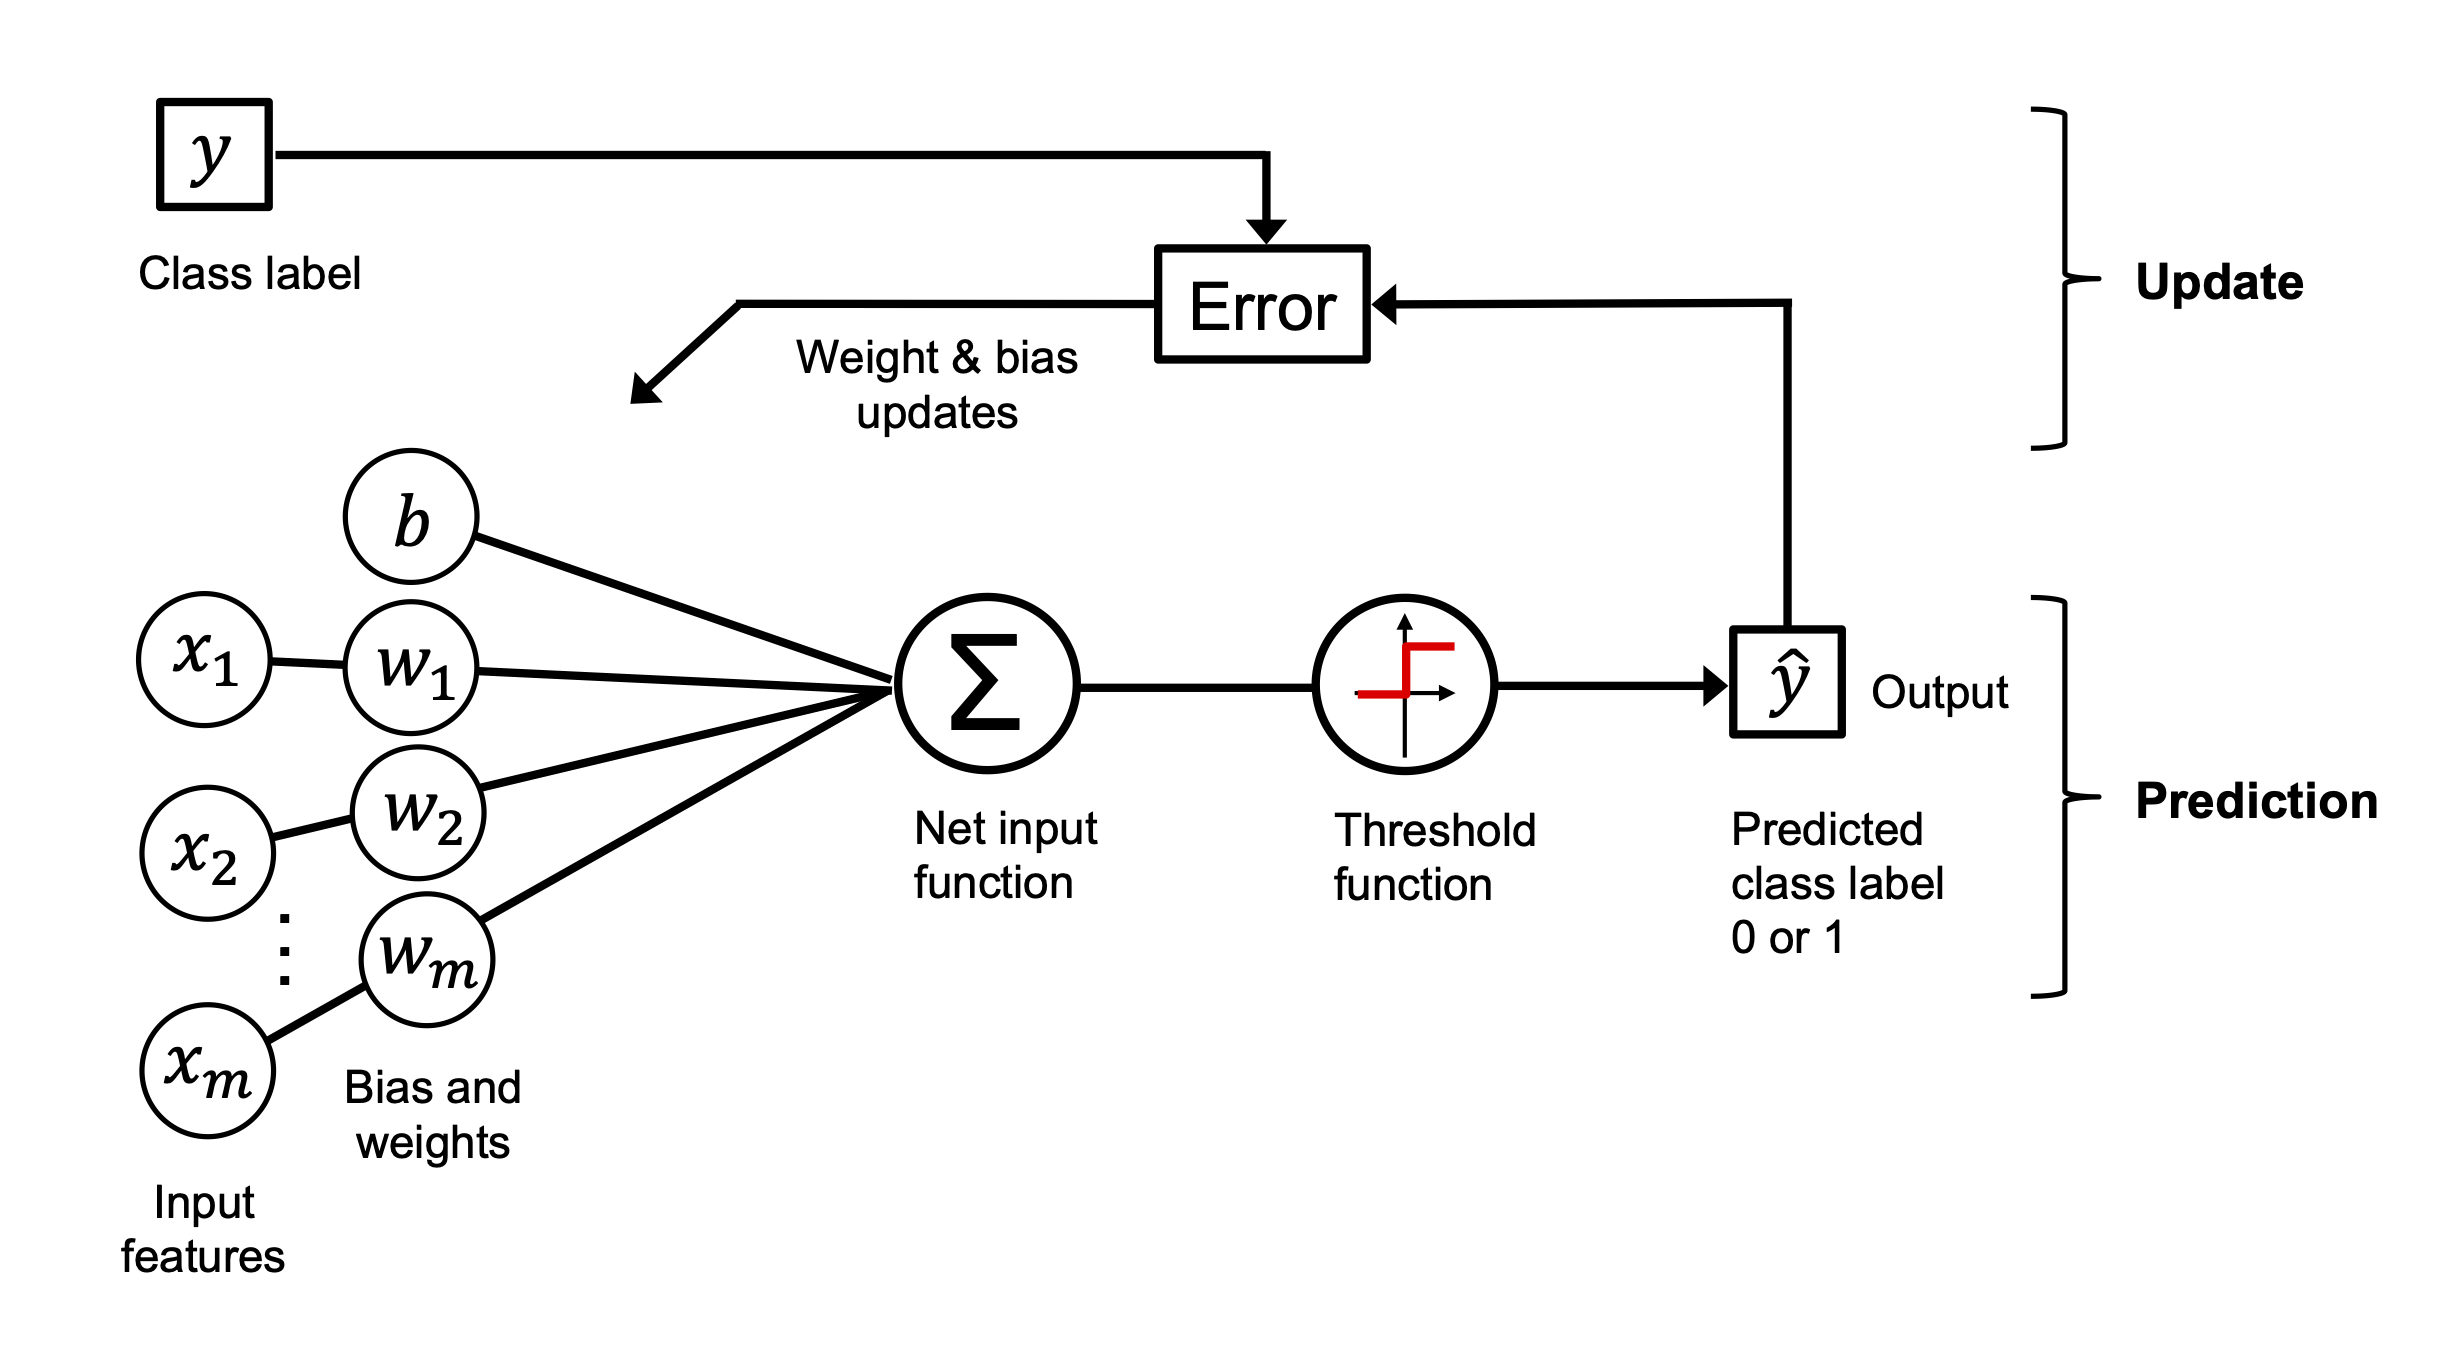

In [22]:
Image(filename="../assets/images/perceptron.png", width=600)

In [23]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [24]:
y_pred_ppm = ppn.predict(X_test_std)
print("Misclassified examples: %d" % (y_test != y_pred_ppm).sum())
print("Accuracy: %.2f" % (accuracy_score(y_test, y_pred_ppm) * 100) + "%")

Misclassified examples: 52
Accuracy: 74.63%


Although the perceptron rule offers a nice and easy-going introduction to machine learning algorithms for classification, its biggest disadvantage is that it never converges if the classes are not perfectly lin- early separable.

To make better use of our time, we will now take a look at another simple, yet more powerful, algo- rithm for linear and binary classification problems: logistic regression. Note that, despite its name, logistic regression is a model for classification, not regression.


#### Logistic regression

Logistic regression is a classification model that is very easy to implement and performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry.

Similar to the perceptron, the logistic regression model in this section is also a linear model for binary classification.


In [25]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [26]:
lr_predict = lr.predict(X_test_std)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:", lr_acc_score * 100, "%\n")
print(classification_report(y_test, lr_predict))

confusion matrix
[[76 24]
 [10 95]]


Accuracy of Logistic Regression: 83.41463414634146 %

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       100
           1       0.80      0.90      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



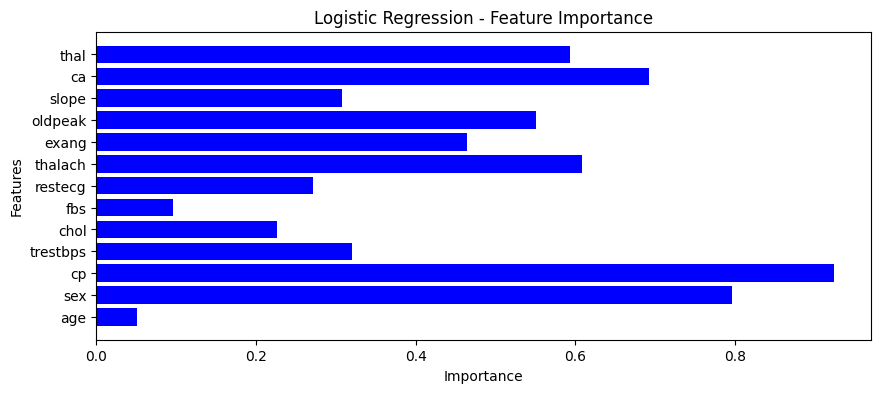

In [27]:
# Extracting feature importance for Logistic Regression
lr_feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": np.abs(lr.coef_[0])}
)

# Plotting feature importance
plt.figure(figsize=(10, 4))
plt.title("Logistic Regression - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(lr_feature_importance["Feature"], lr_feature_importance["Importance"], color="blue")
plt.show()

#### Naive Bayes

In [28]:
nb = GaussianNB()
nb.fit(X_train_std, y_train)

GaussianNB()

In [29]:
nb_predict = nb.predict(X_test_std)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes:", nb_acc_score * 100, "%\n")
print(classification_report(y_test, nb_predict))

confusion matrix
[[78 22]
 [13 92]]


Accuracy of Naive Bayes: 82.92682926829268 %

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.81      0.88      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



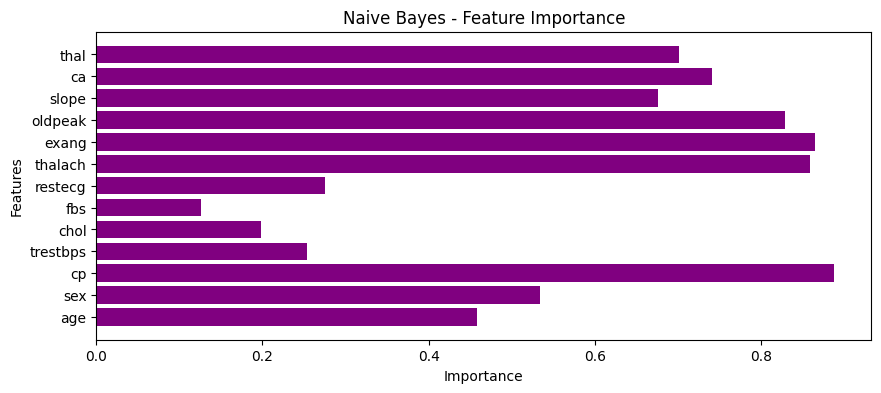

In [30]:
# Naive Bayes doesn't inherently provide feature importance, but you can explore coefficient magnitudes
# For simplicity, let's use absolute values of coefficients
nb_feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": np.abs(nb.theta_[1] - nb.theta_[0])}
)

# Plotting feature importance
plt.figure(figsize=(10, 4))
plt.title("Naive Bayes - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(nb_feature_importance["Feature"], nb_feature_importance["Importance"], color="purple")
plt.show()

#### Random forest

In [31]:
rf = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=8)
rf.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=1)

In [32]:
rf_predict = rf.predict(X_test_std)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)

print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", rf_acc_score * 100, "%\n")
print(classification_report(y_test, rf_predict))

confusion matrix
[[100   0]
 [  0 105]]


Accuracy of Random Forest: 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



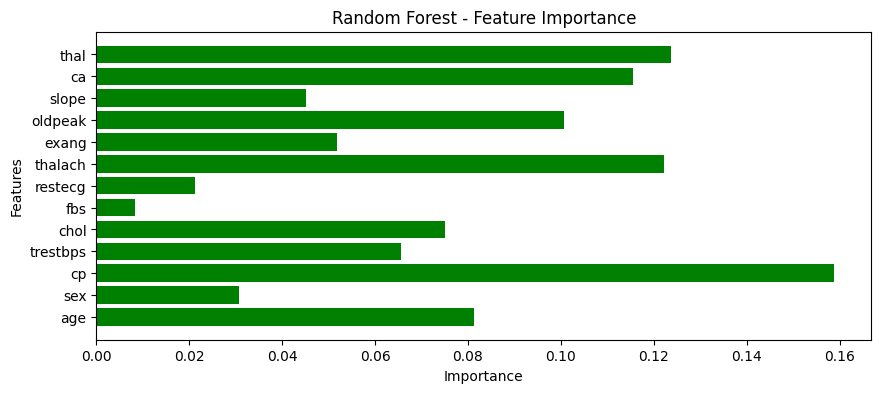

In [33]:
# Calculate feature importance for Random Forest
rf_feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": rf.feature_importances_}
)

# Plotting feature importance
plt.figure(figsize=(10, 4))
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(rf_feature_importance["Feature"], rf_feature_importance["Importance"], color="green")
plt.show()

#### Extreme Gradient Boost

In [34]:
xgb = XGBClassifier(
    learning_rate=1,
    n_estimators=50,
    max_depth=8,
    gamma=0.6,
    subsample=0.52,
    colsample_bytree=0.6,
    seed=27,
    reg_lambda=2,
    booster="dart",
    colsample_bylevel=0.6,
    colsample_bynode=0.5,
)
xgb.fit(X_train_std, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [35]:
xgb_predict = xgb.predict(X_test_std)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)

print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of XGBoost:", xgb_acc_score * 100, "%\n")
print(classification_report(y_test, xgb_predict))

confusion matrix
[[ 98   2]
 [  2 103]]


Accuracy of XGBoost: 98.04878048780488 %

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



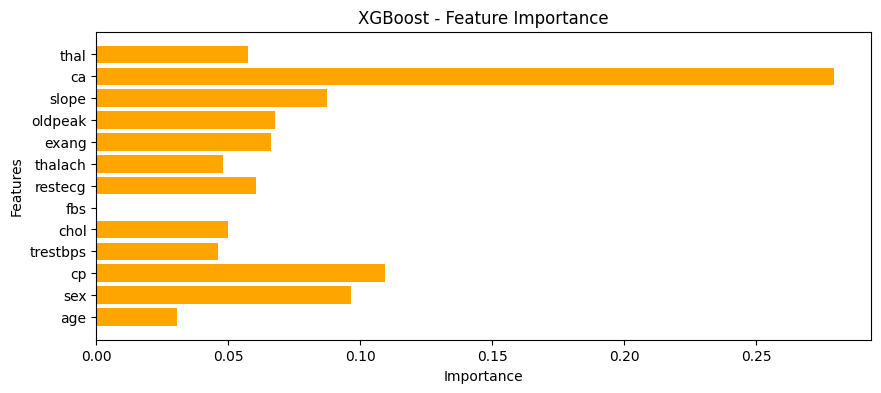

In [36]:
# Calculate feature importance for XGBoost
xgb_feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": xgb.feature_importances_}
)

# Plotting feature importance
plt.figure(figsize=(10, 4))
plt.title("XGBoost - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(xgb_feature_importance["Feature"], xgb_feature_importance["Importance"], color="orange")
plt.show()

#### K-NeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
knn_predict = knn.predict(X_test_std)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)

print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of KNN:", knn_acc_score * 100, "%\n")
print(classification_report(y_test, knn_predict))

confusion matrix
[[100   0]
 [  0 105]]


Accuracy of KNN: 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



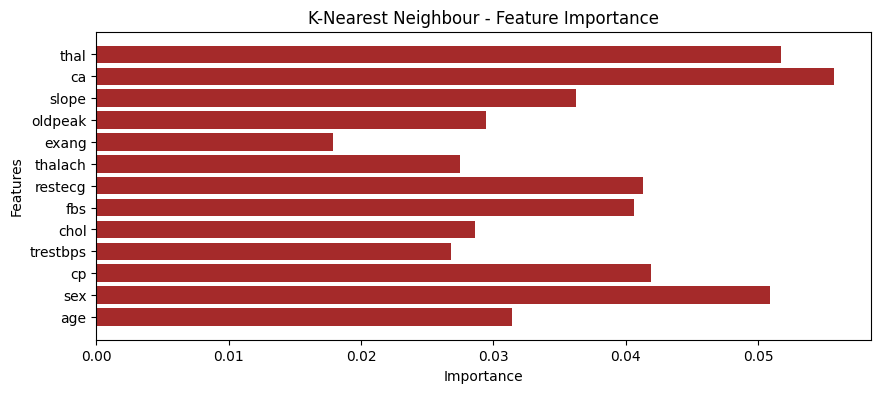

In [39]:
# Calculate feature importance for KNN
knn_perm_importance = permutation_importance(knn, X_test_std, y_test, n_repeats=30, random_state=1)

# Plotting feature importance
knn_feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": knn_perm_importance.importances_mean}
)

plt.figure(figsize=(10, 4))
plt.title("K-Nearest Neighbour - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(knn_feature_importance["Feature"], knn_feature_importance["Importance"], color="brown")
plt.show()

#### DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=8)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [41]:
dt_predict = dt.predict(X_test_std)
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)

print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:", dt_acc_score * 100, "%\n")
print(classification_report(y_test, dt_predict))

confusion matrix
[[ 99   1]
 [  1 104]]


Accuracy of Decision Tree: 99.02439024390245 %

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.99      0.99      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



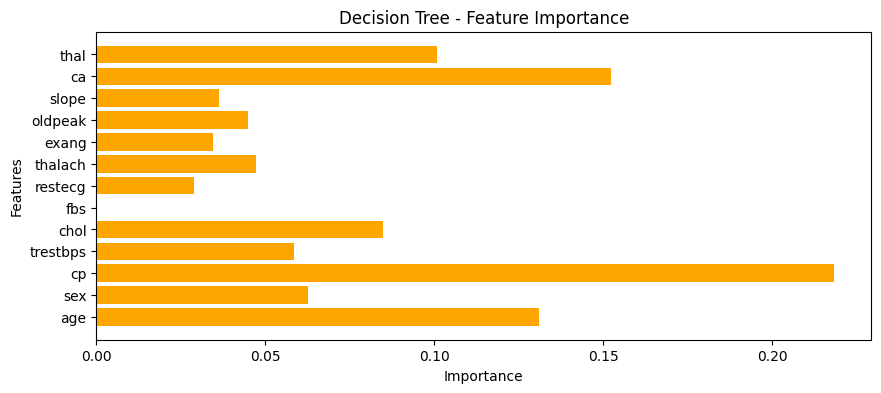

In [42]:
# Extracting feature importance for Decision Tree
dt_feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": dt.feature_importances_}
)

# Plotting feature importance
plt.figure(figsize=(10, 4))
plt.title("Decision Tree - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(dt_feature_importance["Feature"], dt_feature_importance["Importance"], color="orange")
plt.show()

#### Support Vector Classifier

In [43]:
svc = SVC(kernel="rbf", C=2.9, random_state=1)
svc.fit(X_train_std, y_train)

SVC(C=2.9, random_state=1)

In [44]:
svc_predict = svc.predict(X_test_std)
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)

print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score * 100, "%\n")
print(classification_report(y_test, svc_predict))

confusion matrix
[[ 97   3]
 [  5 100]]


Accuracy of Support Vector Classifier: 96.09756097560975 %

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.95      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



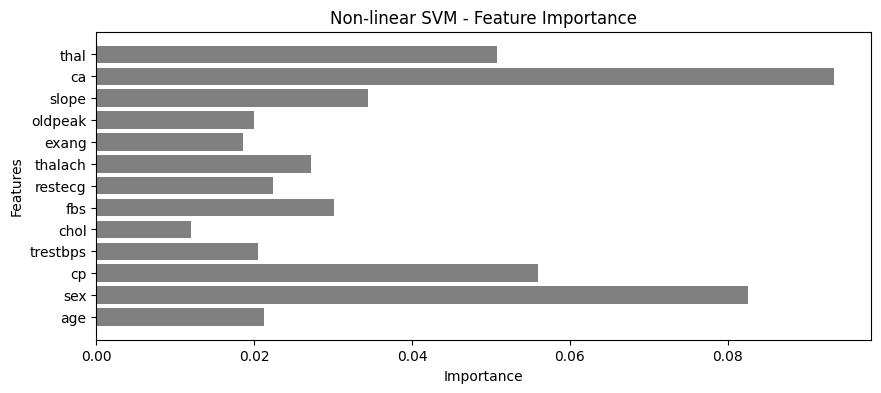

In [45]:
# Calculate feature importance using permutation importance
svc_rbf_perm_importance = permutation_importance(svc, X_test_std, y_test, n_repeats=30, random_state=1)

# Plotting feature importance
svc_rbf_feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": svc_rbf_perm_importance.importances_mean}
)

plt.figure(figsize=(10, 4))
plt.title("Non-linear SVM - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(svc_rbf_feature_importance["Feature"], svc_rbf_feature_importance["Importance"], color="gray")
plt.show()

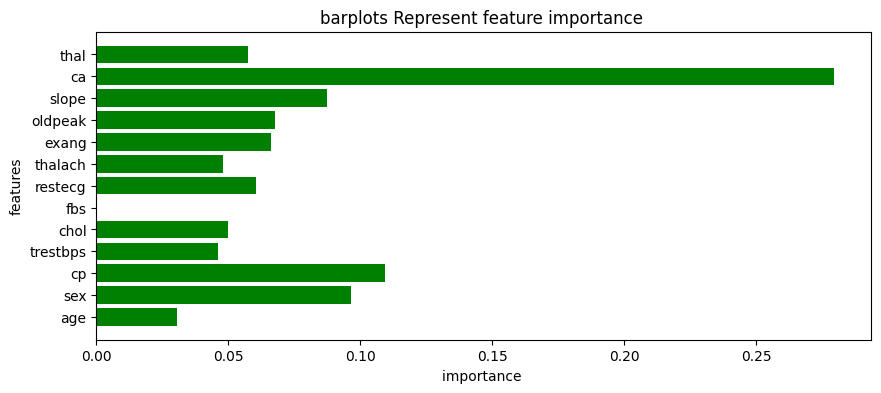

In [46]:
imp_feature = pd.DataFrame(
    {
        "Feature": [
            "age",
            "sex",
            "cp",
            "trestbps",
            "chol",
            "fbs",
            "restecg",
            "thalach",
            "exang",
            "oldpeak",
            "slope",
            "ca",
            "thal",
        ],
        "Importance": xgb.feature_importances_,
    }
)
plt.figure(figsize=(10, 4))
plt.title("barplots Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature["Feature"], imp_feature["Importance"], color="green")
plt.show()

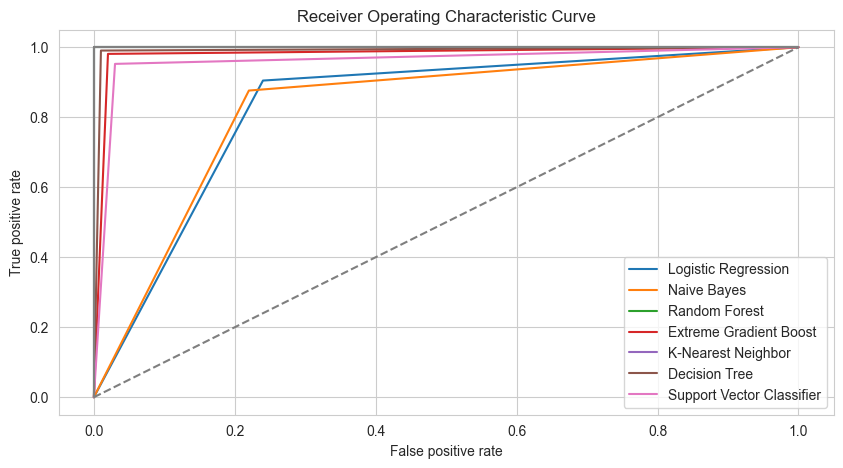

In [47]:
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(
    y_test, lr_predict
)
nb_false_positive_rate, nb_true_positive_rate, nb_threshold = roc_curve(
    y_test, nb_predict
)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(
    y_test, rf_predict
)
xgb_false_positive_rate, xgb_true_positive_rate, xgb_threshold = roc_curve(
    y_test, xgb_predict
)
knn_false_positive_rate, knn_true_positive_rate, knn_threshold = roc_curve(
    y_test, knn_predict
)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(
    y_test, dt_predict
)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(
    y_test, svc_predict
)


sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.title("Receiver Operating Characteristic Curve")
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label="Logistic Regression")
plt.plot(nb_false_positive_rate, nb_true_positive_rate, label="Naive Bayes")
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label="Random Forest")
plt.plot(
    xgb_false_positive_rate, xgb_true_positive_rate, label="Extreme Gradient Boost"
)
plt.plot(knn_false_positive_rate, knn_true_positive_rate, label="K-Nearest Neighbor")
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label="Decision Tree")
plt.plot(
    svc_false_positive_rate, svc_true_positive_rate, label="Support Vector Classifier"
)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".5")
plt.plot([1, 1], c=".5")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

### Model Evaluation

In [48]:
model_ev = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Naive Bayes",
            "Random Forest",
            "Extreme Gradient Boost",
            "K-Nearest Neighbour",
            "Decision Tree",
            "Support Vector Machine",
        ],
        "Accuracy": [
            lr_acc_score * 100,
            nb_acc_score * 100,
            rf_acc_score * 100,
            xgb_acc_score * 100,
            knn_acc_score * 100,
            dt_acc_score * 100,
            svc_acc_score * 100,
        ],
    }
)
model_ev

,Model,Accuracy
0,Logistic Regression,83.414634
1,Naive Bayes,82.926829
2,Random Forest,100.000000
3,Extreme Gradient Boost,98.048780
4,K-Nearest Neighbour,100.000000
5,Decision Tree,99.024390
6,Support Vector Machine,96.097561


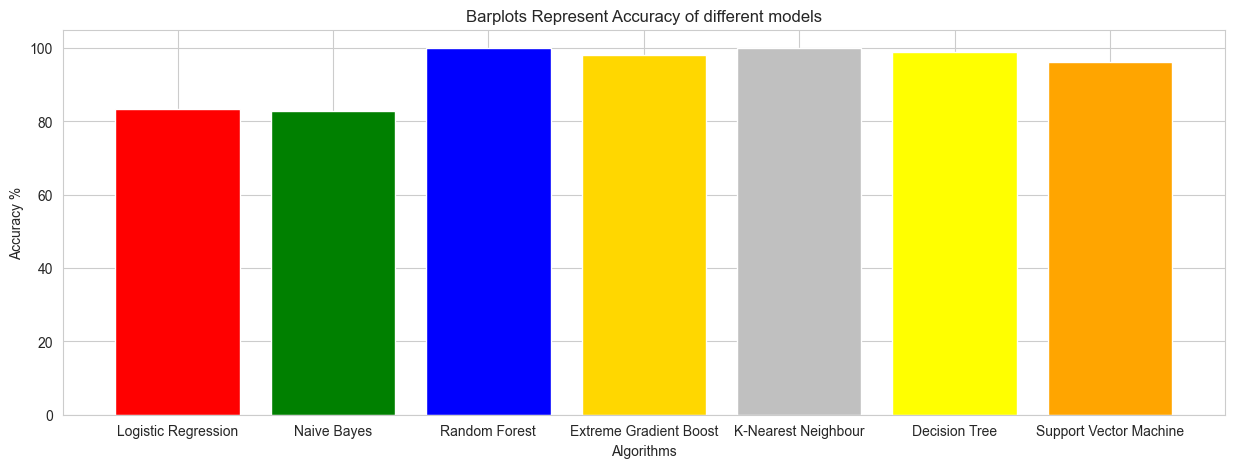

In [49]:
colors = [
    "red",
    "green",
    "blue",
    "gold",
    "silver",
    "yellow",
    "orange",
]
plt.figure(figsize=(15, 5))
plt.title("Barplots Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev["Model"], model_ev["Accuracy"], color=colors)
plt.show()